In [14]:
# For Data Manipulation
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

# For Data Visualisation
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load in the data set
df = pd.read_csv("Data\MockDataSet1_Cleaned.csv")
df

,QuoteRef,Channel,Product,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
0,QPCW-43,CTM,Level,1.0,1,38.0,20,36.22,1116.22,0,477.0,NaN,NaN,NaN,17.0,7.0,5.0,NaN,NaN
1,XXHO-52,CTM,Level accelerated,1.0,0,47.0,10,29.36,673.04,0,562.0,3.0,NaN,3.0,9.0,8.0,4.0,0.0,NaN
2,KTGM-13,Direct,Decreasing with CI,0.0,1,47.0,10,20.00,452.07,0,472.0,8.0,21.0,4.0,9.0,7.0,4.0,2.0,12.0
3,LKFU-15,MSM,Level with CI,1.0,0,37.0,5,20.00,452.07,0,472.0,8.0,21.0,4.0,9.0,7.0,4.0,2.0,12.0
4,OZIK-66,Direct,Level with CI,0.0,1,35.0,20,22.41,572.16,0,563.0,2.0,NaN,2.0,17.0,5.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,EQIE-29,CTM,Level accelerated,1.0,1,41.0,20,19.80,479.64,0,589.0,0.0,157.0,3.0,14.0,4.0,5.0,0.0,NaN
2740,GUZK-85,Direct,Level,1.0,1,41.0,5,17.07,477.05,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741,ZEFY-74,CTM,Level accelerated,1.0,0,49.0,30,62.69,1878.51,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2742,HLVT-14,CTM,Level with CI,0.0,0,47.0,10,62.69,1878.51,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Get Numerical Summaries
df.describe()

,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
count,2743.00000,2744.000000,2743.000000,2744.000000,2744.000000,2744.000000,2744.000000,2033.000000,1923.000000,951.000000,1923.000000,1952.000000,1990.000000,1955.000000,1923.000000,68.000000
mean,0.60226,0.388484,44.271965,20.670554,33.006866,820.613903,0.236880,555.063945,2.650546,47.461619,7.109204,13.099385,4.836683,5.187724,0.049922,33.382353
std,0.48952,0.487494,8.195040,8.919296,37.479934,1019.681427,0.425246,24.235188,2.311709,51.711328,6.003860,5.316952,1.658642,2.710541,0.285996,18.443969
min,0.00000,0.000000,18.000000,5.000000,2.980000,0.000000,0.000000,441.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
25%,0.00000,0.000000,39.000000,15.000000,13.215000,306.665000,0.000000,545.000000,1.000000,19.500000,3.000000,9.000000,4.000000,3.000000,0.000000,16.250000
50%,1.00000,0.000000,45.000000,20.000000,23.360000,530.020000,0.000000,560.000000,2.000000,26.000000,6.000000,13.000000,5.000000,5.000000,0.000000,37.000000
75%,1.00000,1.000000,49.000000,30.000000,37.530000,935.380000,0.000000,571.000000,4.000000,61.000000,9.000000,17.000000,6.000000,7.000000,0.000000,46.000000
max,1.00000,1.000000,64.000000,40.000000,489.070000,13600.190000,1.000000,608.000000,12.000000,397.000000,55.000000,24.000000,8.000000,10.000000,3.000000,71.000000


In [17]:
df_sold = df[df['Sold'] == 1]
df_sold.describe()

,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.0,513.000000,508.000000,281.000000,508.000000,498.000000,507.000000,498.000000,508.00000,14.000000
mean,0.607692,0.387692,43.932308,19.961538,24.844385,577.947538,1.0,556.243665,2.809055,43.629893,7.710630,13.182731,5.080868,5.592369,0.03937,21.000000
std,0.488641,0.487599,8.118254,8.840657,18.690147,422.318671,0.0,21.280334,2.377773,42.818450,6.911738,5.025162,1.644060,2.786953,0.24812,16.673332
min,0.000000,0.000000,19.000000,5.000000,3.760000,46.370000,1.0,441.000000,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.00000,6.000000
25%,0.000000,0.000000,39.000000,10.000000,11.590000,281.270000,1.0,546.000000,1.000000,20.000000,4.000000,10.000000,4.000000,3.000000,0.00000,12.000000
50%,1.000000,0.000000,45.000000,20.000000,20.420000,473.920000,1.0,558.000000,3.000000,24.000000,6.000000,13.000000,5.000000,6.000000,0.00000,14.000000
75%,1.000000,1.000000,49.000000,30.000000,31.752500,749.300000,1.0,571.000000,4.000000,60.000000,9.000000,17.000000,7.000000,8.000000,0.00000,38.000000
max,1.000000,1.000000,64.000000,40.000000,194.280000,3470.160000,1.0,589.000000,10.000000,265.000000,55.000000,24.000000,8.000000,10.000000,2.00000,46.000000


In [18]:
# Splitting the feature types
numeric_feats = [
    "Person1 Age",
    "Term",
    "TotalPremium",
    "WGB (No. of other addresses held)",
    "JF (Score)",
    "X (Months same person on ER at current address)",
    "EF (No. of people not same surname at current address)",
    "BB (Number of CCJs)",
    "ND (Months since last CCJ)",
    "NBC"
]

categorical_feats = [
    "Channel",
    "Product",
    "NOB (Property group)",
    "URB (Income group)",
    "LSB (Regional banded house price band)",
] 

binary_feats = [
    "Smoker",
    "Joint?",
    "Sold"
]



all_feats = numeric_feats + categorical_feats + binary_feats
print(len(all_feats))
set(df.columns) - set(all_feats)

18


{'QuoteRef'}

In [19]:
# Checking the cardinality of the categorical features
for feat in categorical_feats:
    print(feat)
    print(df[feat].nunique())

Channel
3
Product
6
NOB (Property group)
24
URB (Income group)
8
LSB (Regional banded house price band)
10


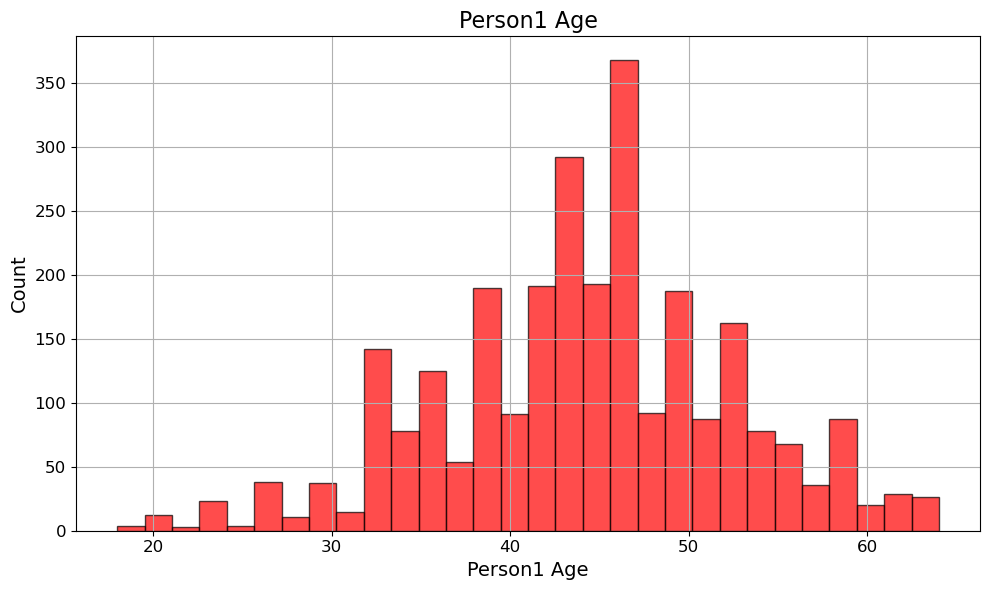

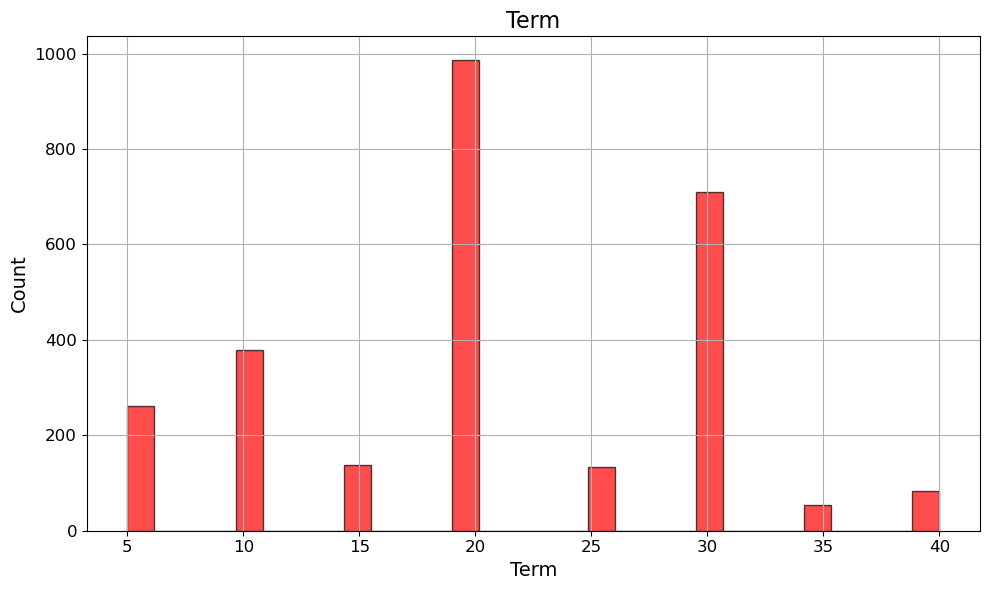

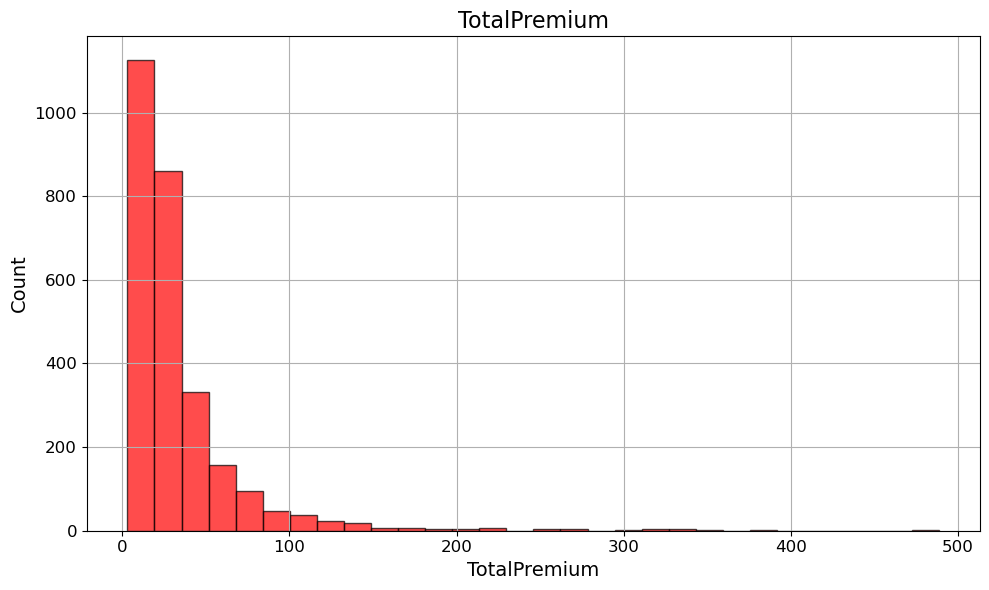

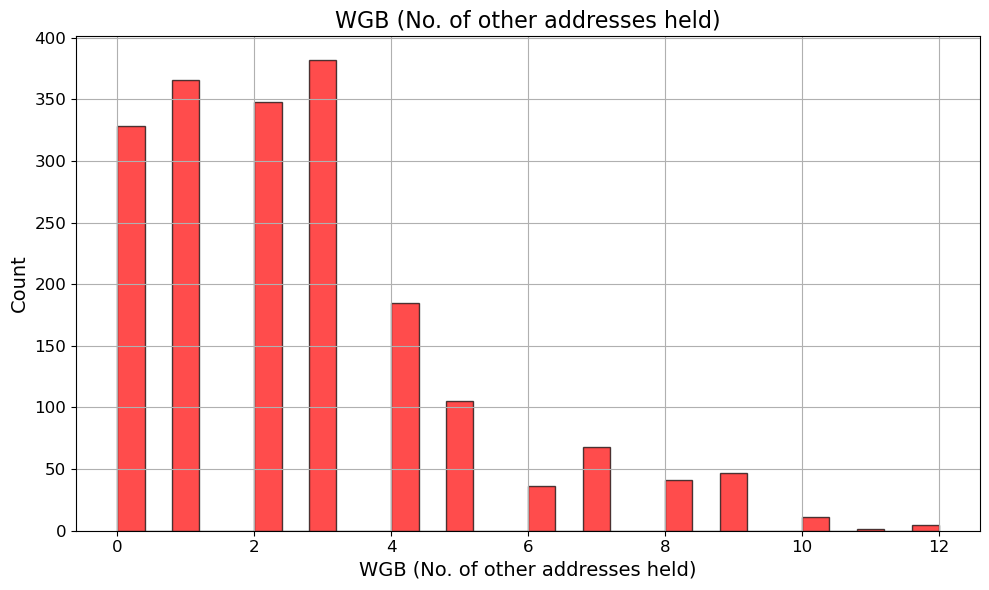

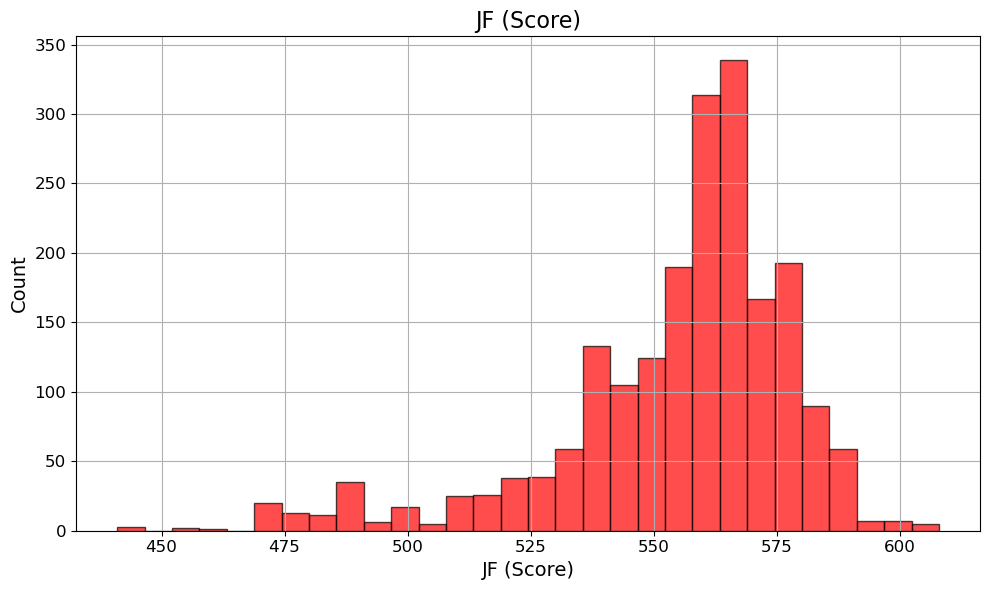

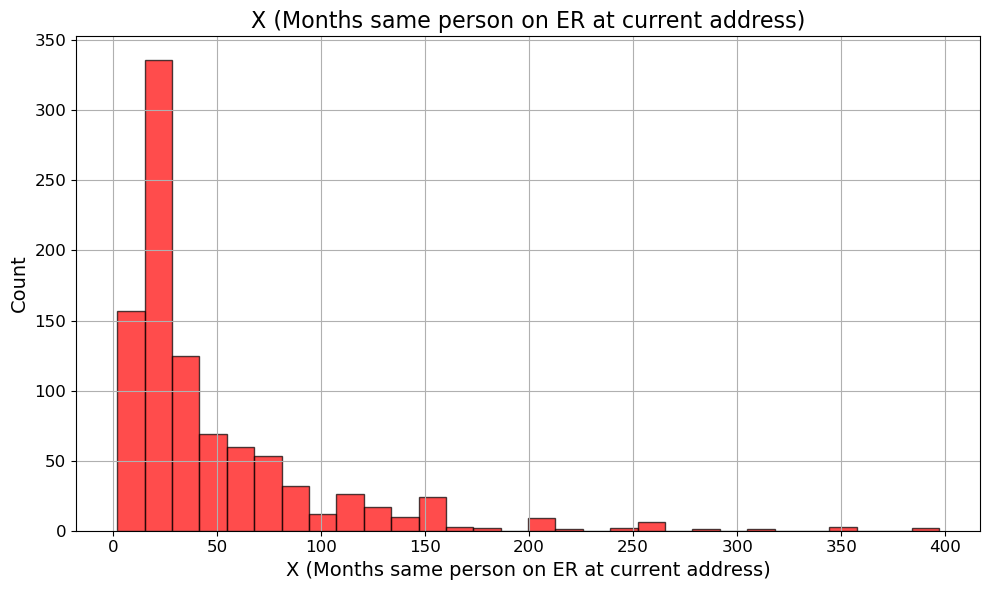

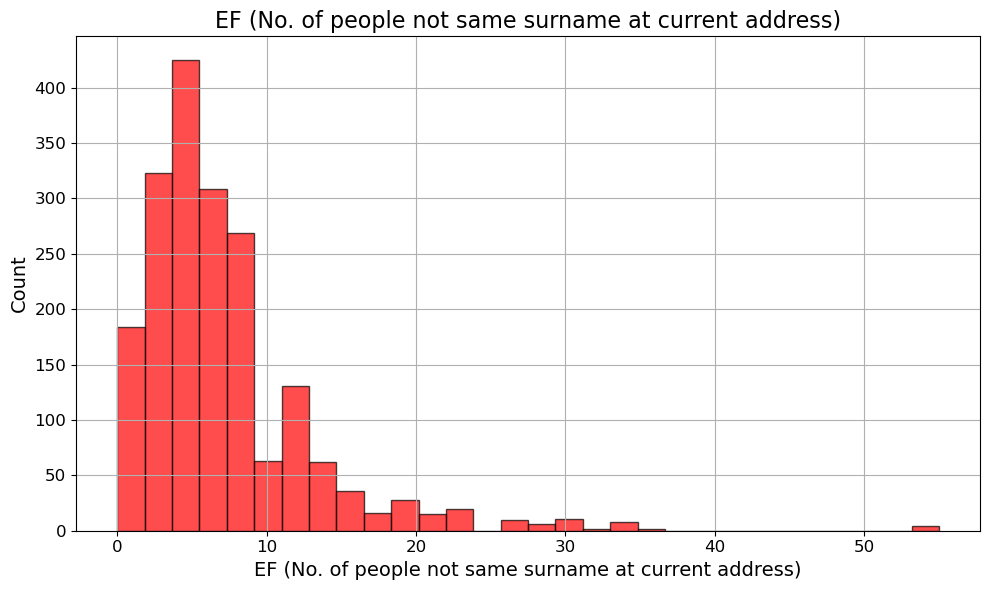

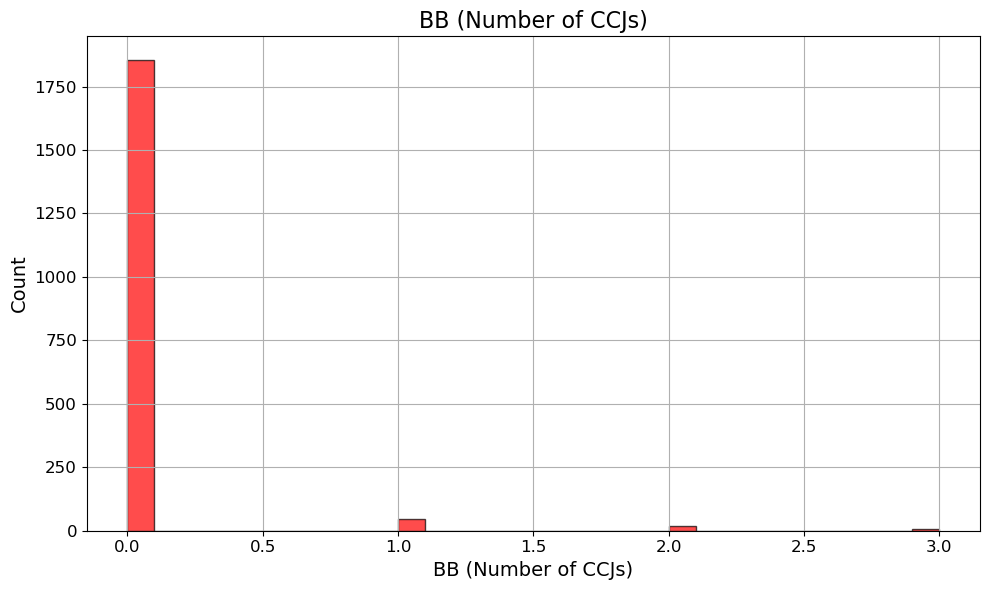

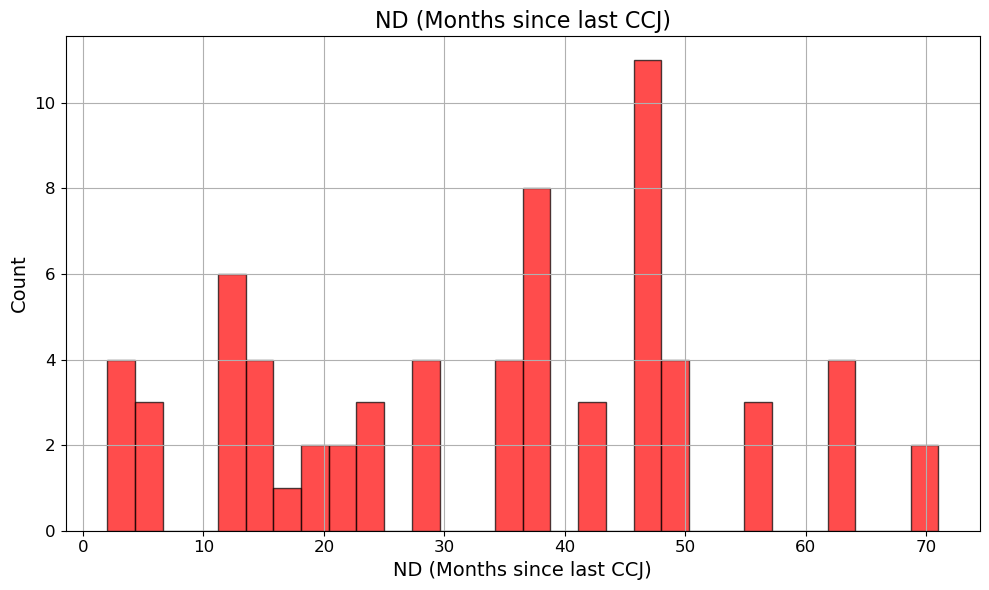

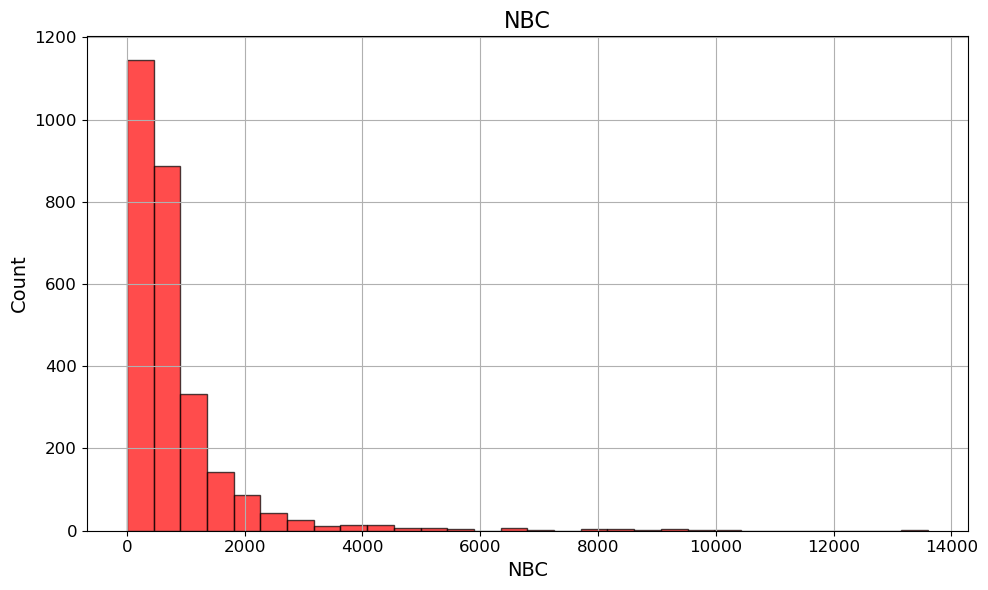

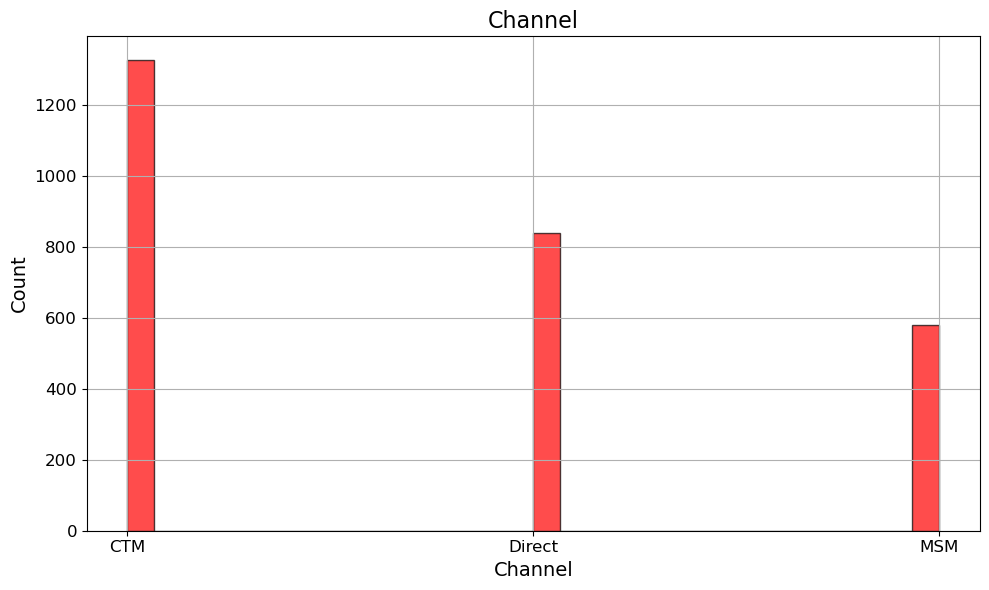

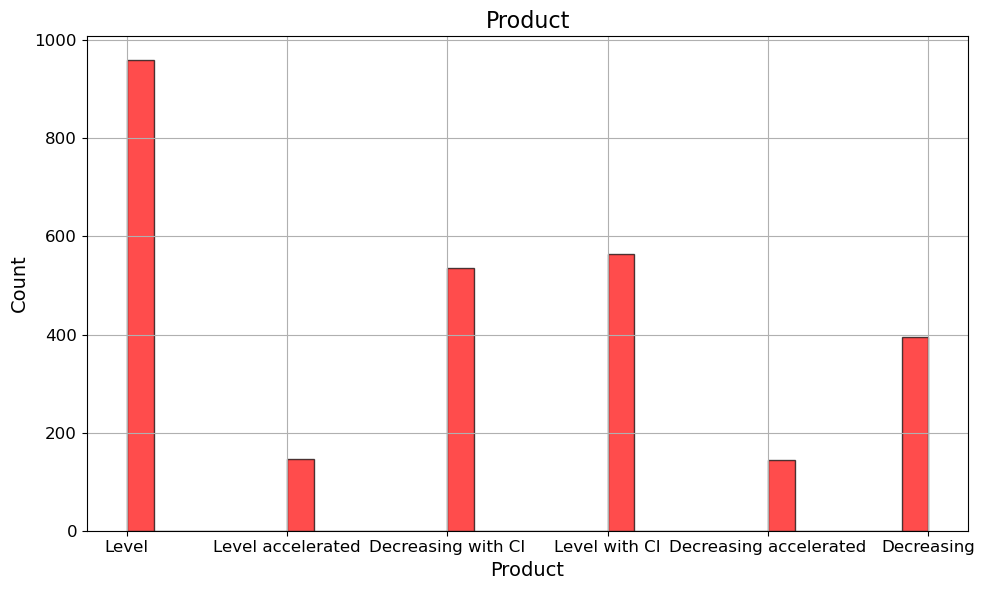

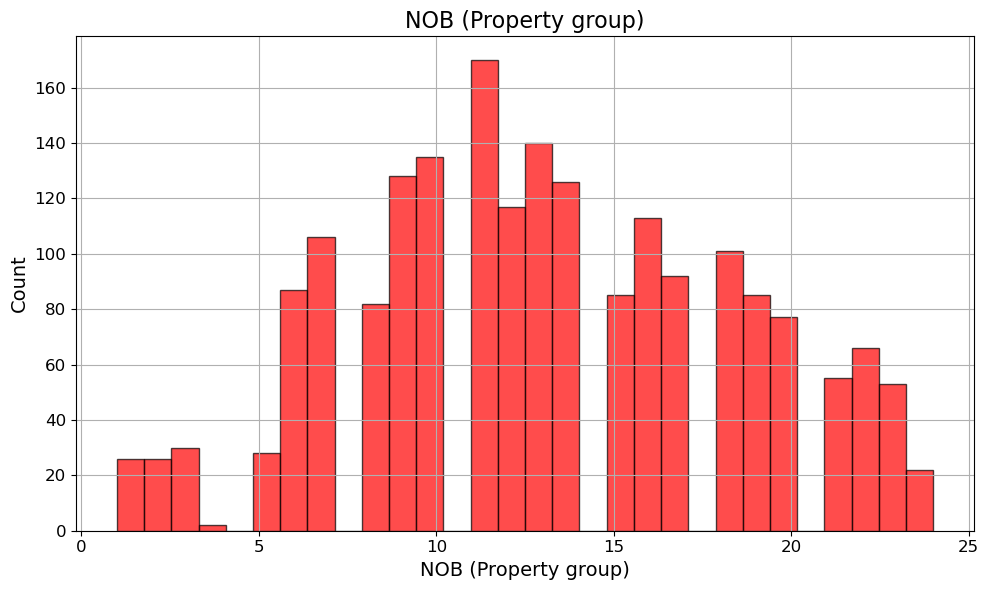

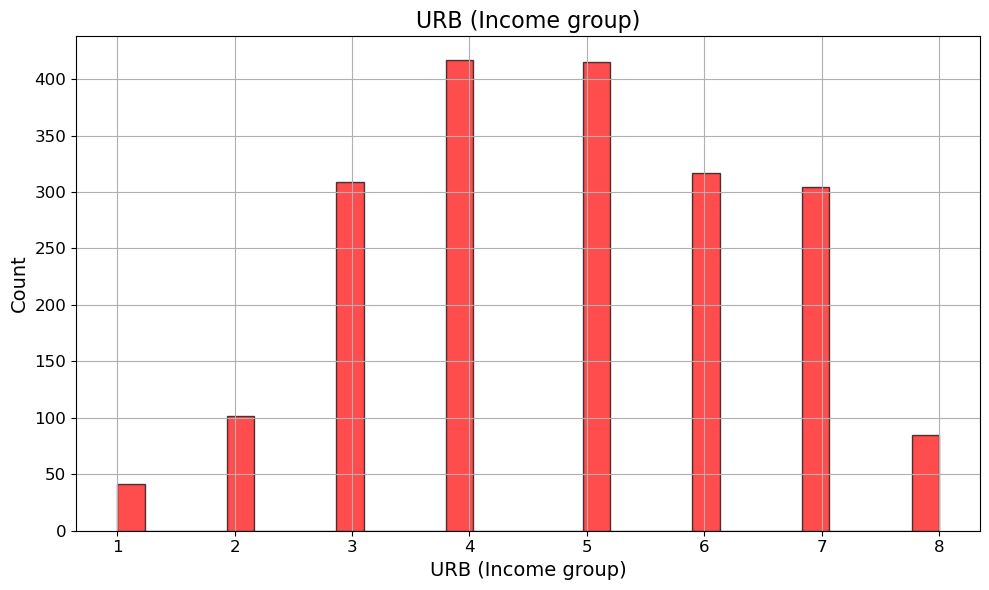

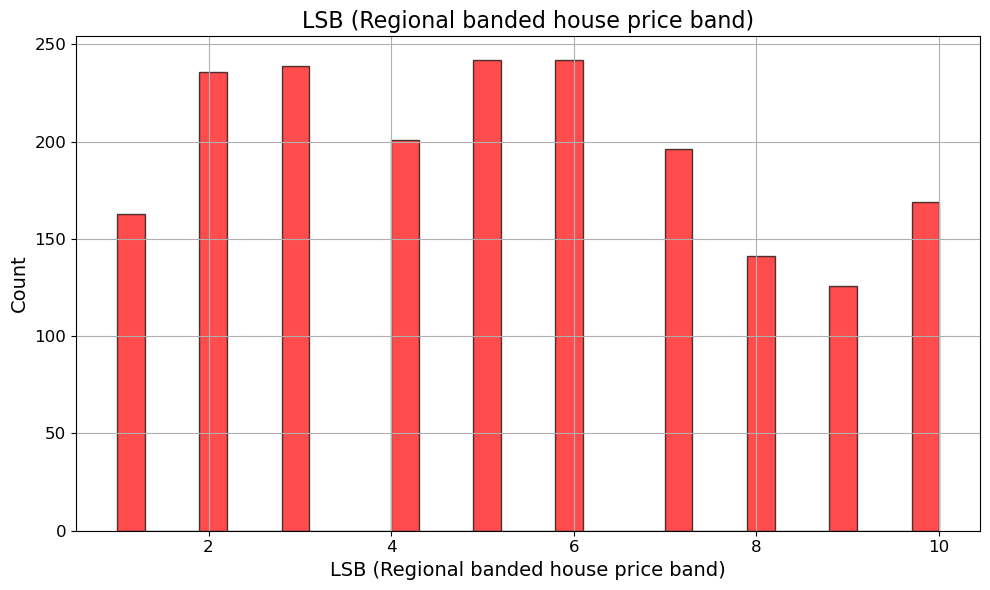

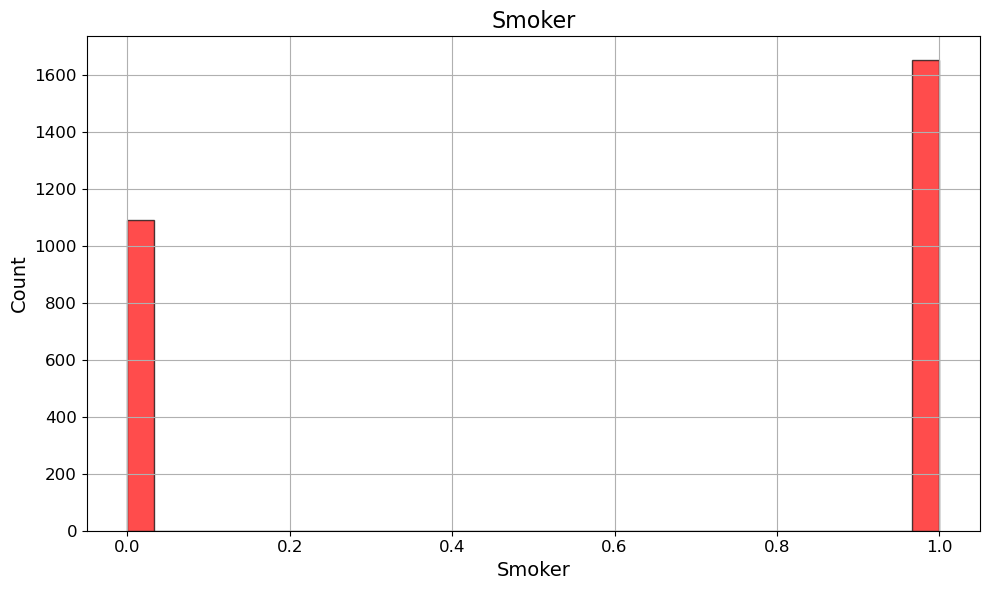

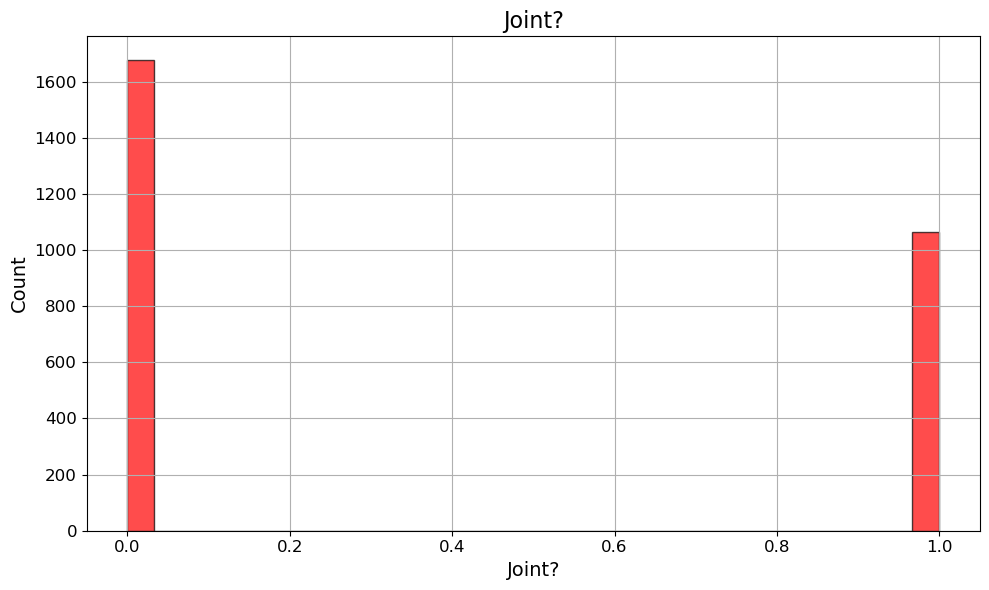

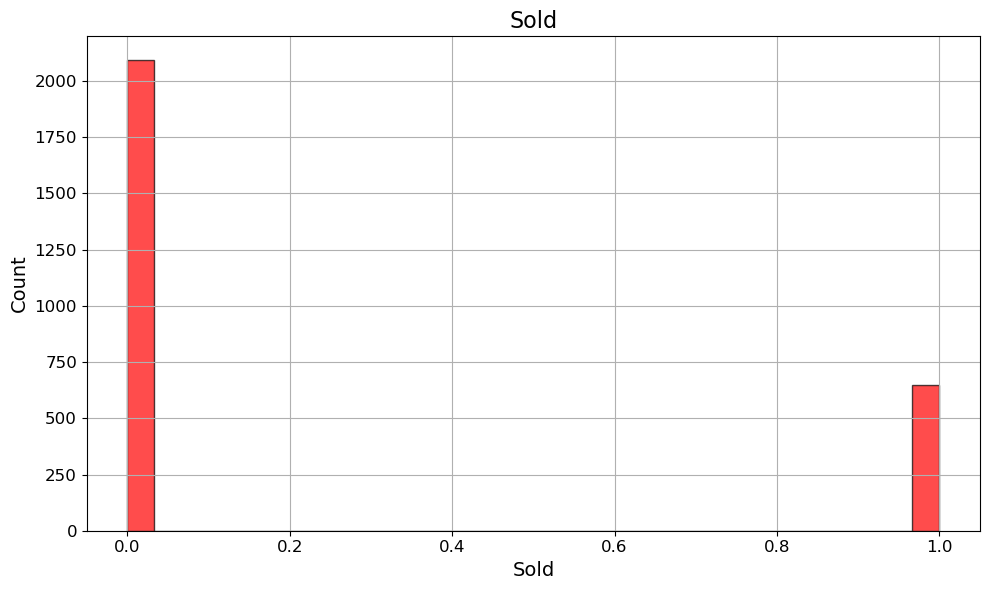

In [20]:
# Get clean distributions for presentation
for feat in all_feats:
    plt.figure(figsize=(10, 6))  # New figure for each feature
    df[feat].hist(bins=30, alpha=0.7, color='red', edgecolor='black')
    plt.title(feat, fontsize=16)
    plt.xlabel(feat, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


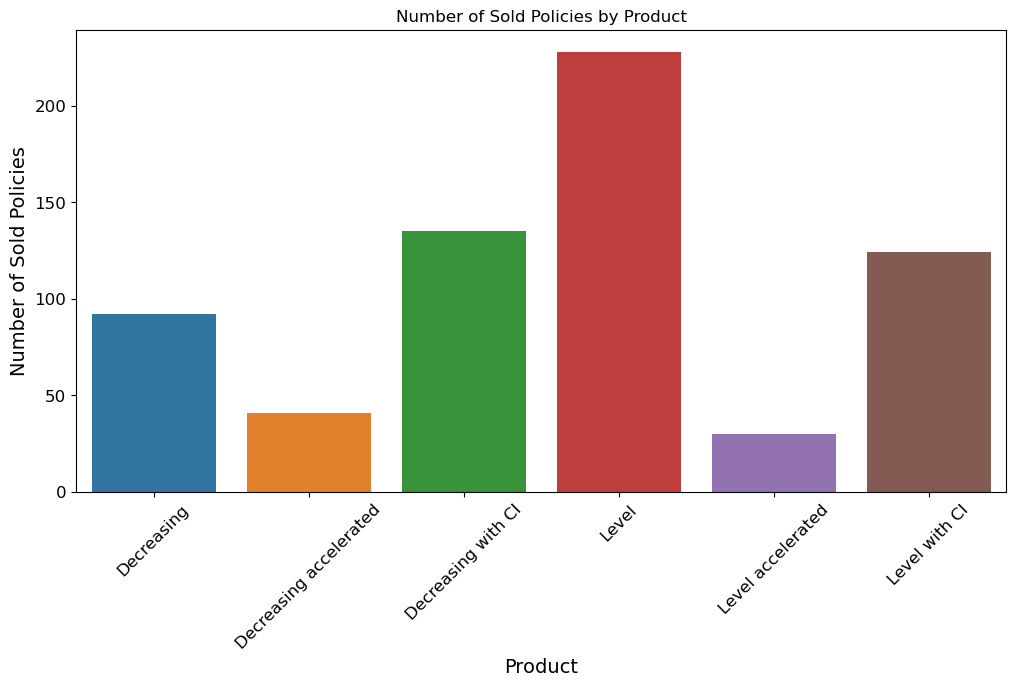

In [21]:
# Number of Sold Policies by Product
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby('Product')['Sold'].sum().index, 
            y=df.groupby('Product')['Sold'].sum().values)
plt.xticks(rotation=45)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Sold Policies', fontsize=14)
plt.title('Number of Sold Policies by Product')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

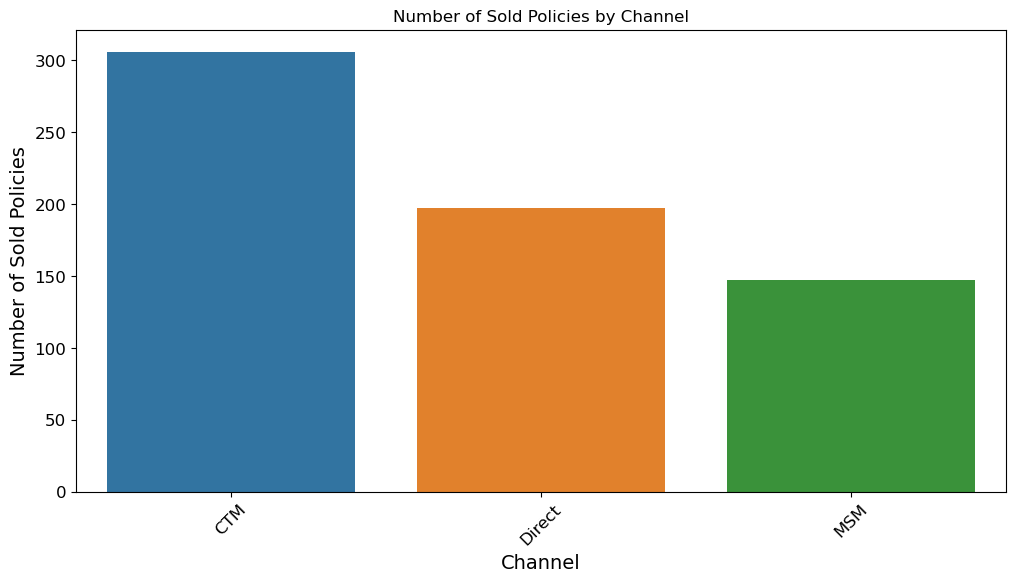

In [22]:
# Number of Sold Policies by Channel
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby('Channel')['Sold'].sum().index, 
            y=df.groupby('Channel')['Sold'].sum().values)
plt.xticks(rotation=45)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Number of Sold Policies', fontsize=14)
plt.title('Number of Sold Policies by Channel')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

C:\Users\Store\AppData\Local\Temp\ipykernel_13216\383292084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["NOB (Property group)"] = pd.to_numeric(df_clean["NOB (Property group)"], errors='coerce')


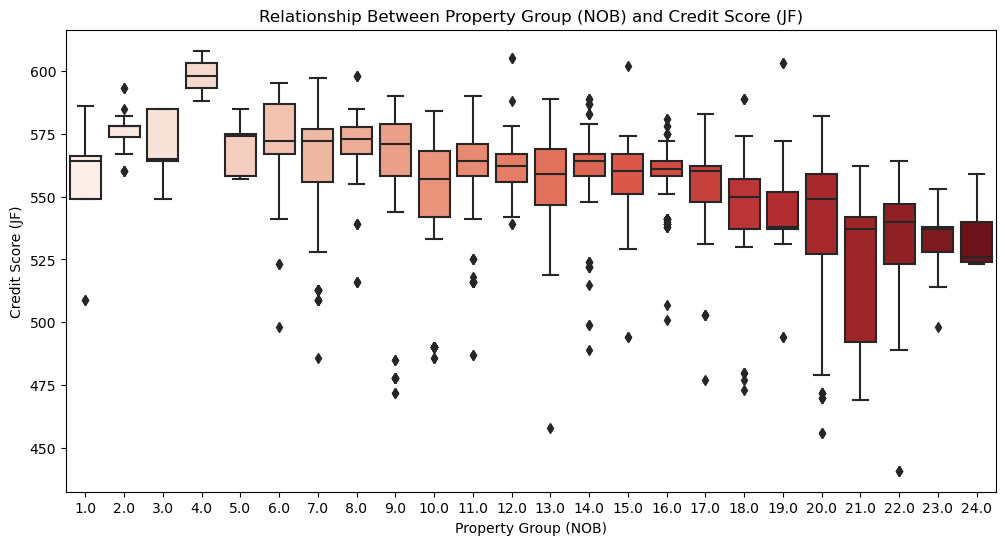

Spearman Correlation: -0.4957266639091852, P-value: 1.3842973672674413e-121


In [23]:
# Drop missing values to ensure proper analysis
df_clean = df.dropna(subset=["NOB (Property group)", "JF (Score)"])

# Convert NOB to numeric 
df_clean["NOB (Property group)"] = pd.to_numeric(df_clean["NOB (Property group)"], errors='coerce')

# Plot relationship using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean["NOB (Property group)"], y=df_clean["JF (Score)"], palette="Reds")
plt.title("Relationship Between Property Group (NOB) and Credit Score (JF)")
plt.xlabel("Property Group (NOB)")
plt.ylabel("Credit Score (JF)")
plt.show()

# Compute Spearman's correlation to statistically test the relationship
spearman_corr, p_value = stats.spearmanr(df_clean["NOB (Property group)"], df_clean["JF (Score)"])

print(f"Spearman Correlation: {spearman_corr}, P-value: {p_value}")

There is a clear correlation and the low p-value indicates this isn't down to chance. Therefore I will assume going forward that this is a ordinal scale with 1 at the top and 24 at the bottom.

C:\Users\Store\AppData\Local\Temp\ipykernel_13216\2122087711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["URB (Income group)"] = pd.to_numeric(df_clean["URB (Income group)"], errors='coerce')


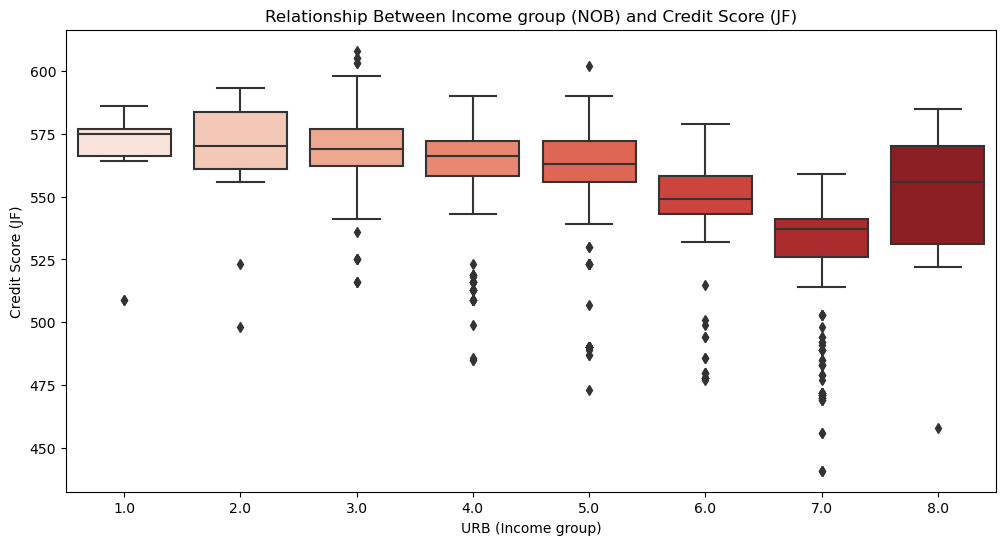

Spearman Correlation: -0.5859069963027648, P-value: 9.032051466064838e-184


In [24]:
# Drop missing values to ensure proper analysis
df_clean = df.dropna(subset=["URB (Income group)", "JF (Score)"])

# Convert NOB to numeric 
df_clean["URB (Income group)"] = pd.to_numeric(df_clean["URB (Income group)"], errors='coerce')

# Plot relationship using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean["URB (Income group)"], y=df_clean["JF (Score)"], palette="Reds")
plt.title("Relationship Between Income group (NOB) and Credit Score (JF)")
plt.xlabel("URB (Income group)")
plt.ylabel("Credit Score (JF)")
plt.show()

# Compute Spearman's correlation to statistically test the relationship
spearman_corr, p_value = stats.spearmanr(df_clean["URB (Income group)"], df_clean["JF (Score)"])

print(f"Spearman Correlation: {spearman_corr}, P-value: {p_value}")


Similar result here, the feature is definitley ordinal.

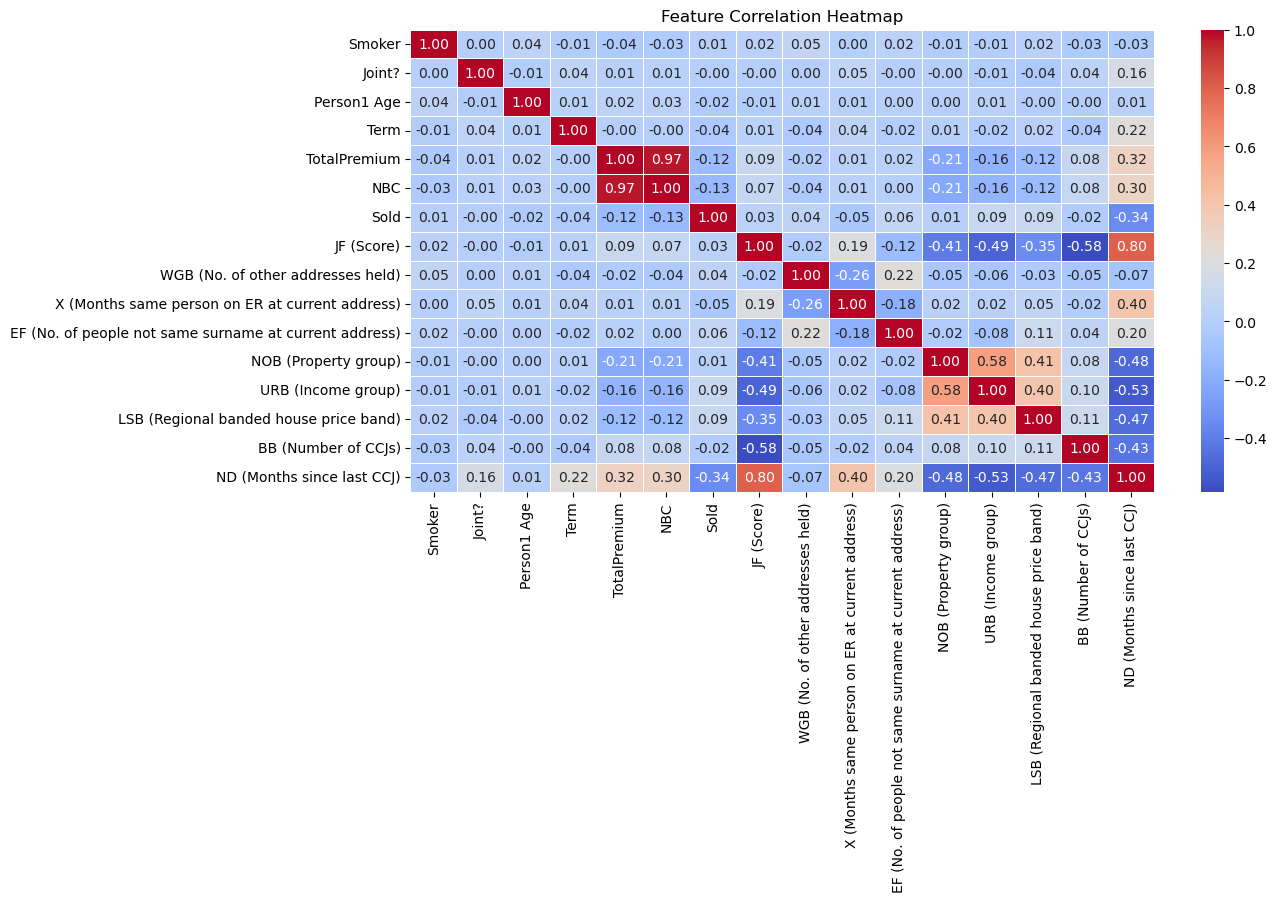

In [25]:
# Plot the correlations between features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

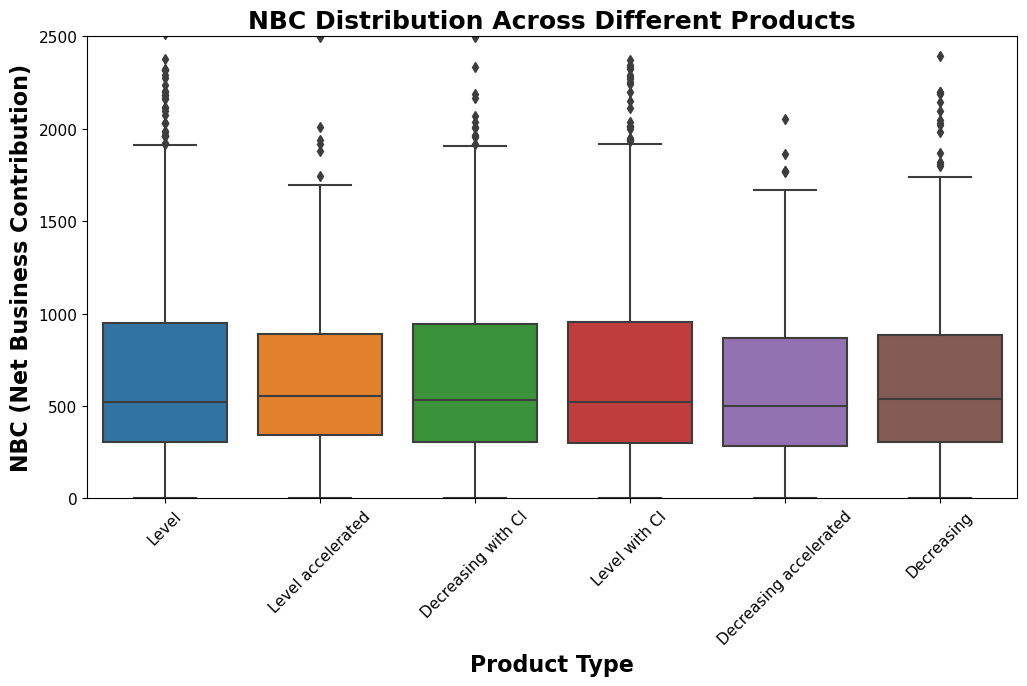

In [33]:
# Boxplot of NBC by Product Type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Product"], y=df["NBC"])
plt.xticks(rotation=45)
plt.xlabel("Product Type", fontsize=16, fontweight='bold')
plt.ylabel("NBC (Net Business Contribution)", fontsize=16, fontweight='bold')
plt.title("NBC Distribution Across Different Products", fontsize=18, fontweight='bold')
plt.ylim(0, 2500)
plt.tick_params(axis='both', which='major', labelsize=11)  # Increase font size of axis ticks
plt.show()

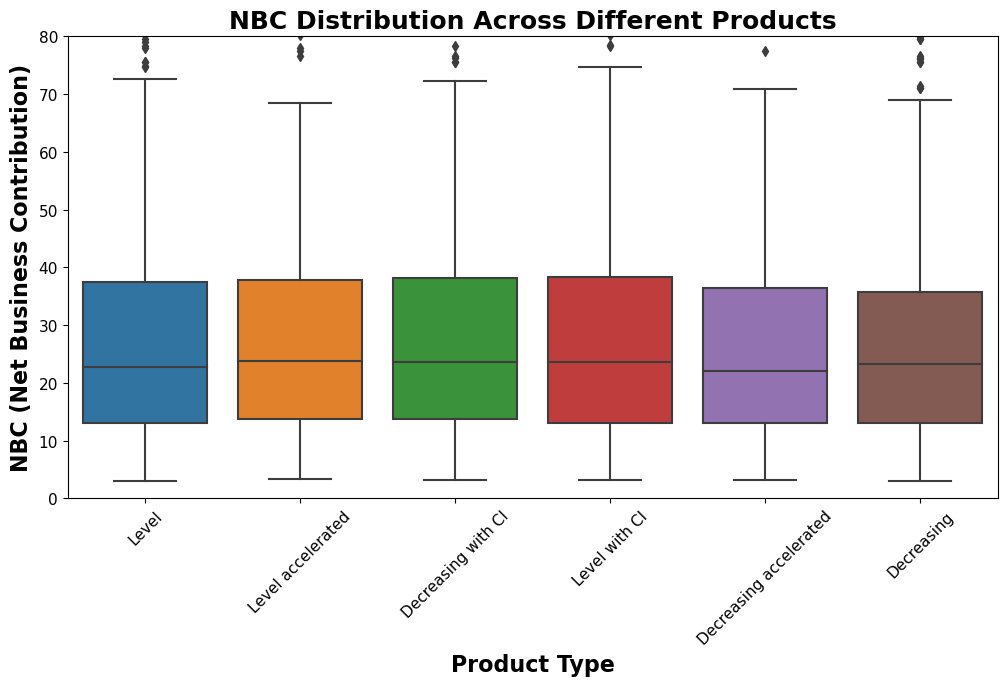

In [34]:
# Boxplot of NBC by Product Type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Product"], y=df["TotalPremium"])
plt.xticks(rotation=45)
plt.xlabel("Product Type", fontsize=16, fontweight='bold')
plt.ylabel("NBC (Net Business Contribution)", fontsize=16, fontweight='bold')
plt.title("NBC Distribution Across Different Products", fontsize=18, fontweight='bold')
plt.ylim(0, 80)
plt.tick_params(axis='both', which='major', labelsize=11)  # Increase font size of axis ticks
plt.show()

In [31]:
df.groupby('Product')['TotalPremium'].mean()

Product
Decreasing                29.900964
Decreasing accelerated    30.920000
Decreasing with CI        33.594486
Level                     33.243771
Level accelerated         33.641224
Level with CI             34.583422
Name: TotalPremium, dtype: float64

In [35]:
df.groupby('Product')['NBC'].mean()

Product
Decreasing                729.396599
Decreasing accelerated    752.077083
Decreasing with CI        830.365159
Level                     838.163021
Level accelerated         860.947075
Level with CI             852.202323
Name: NBC, dtype: float64

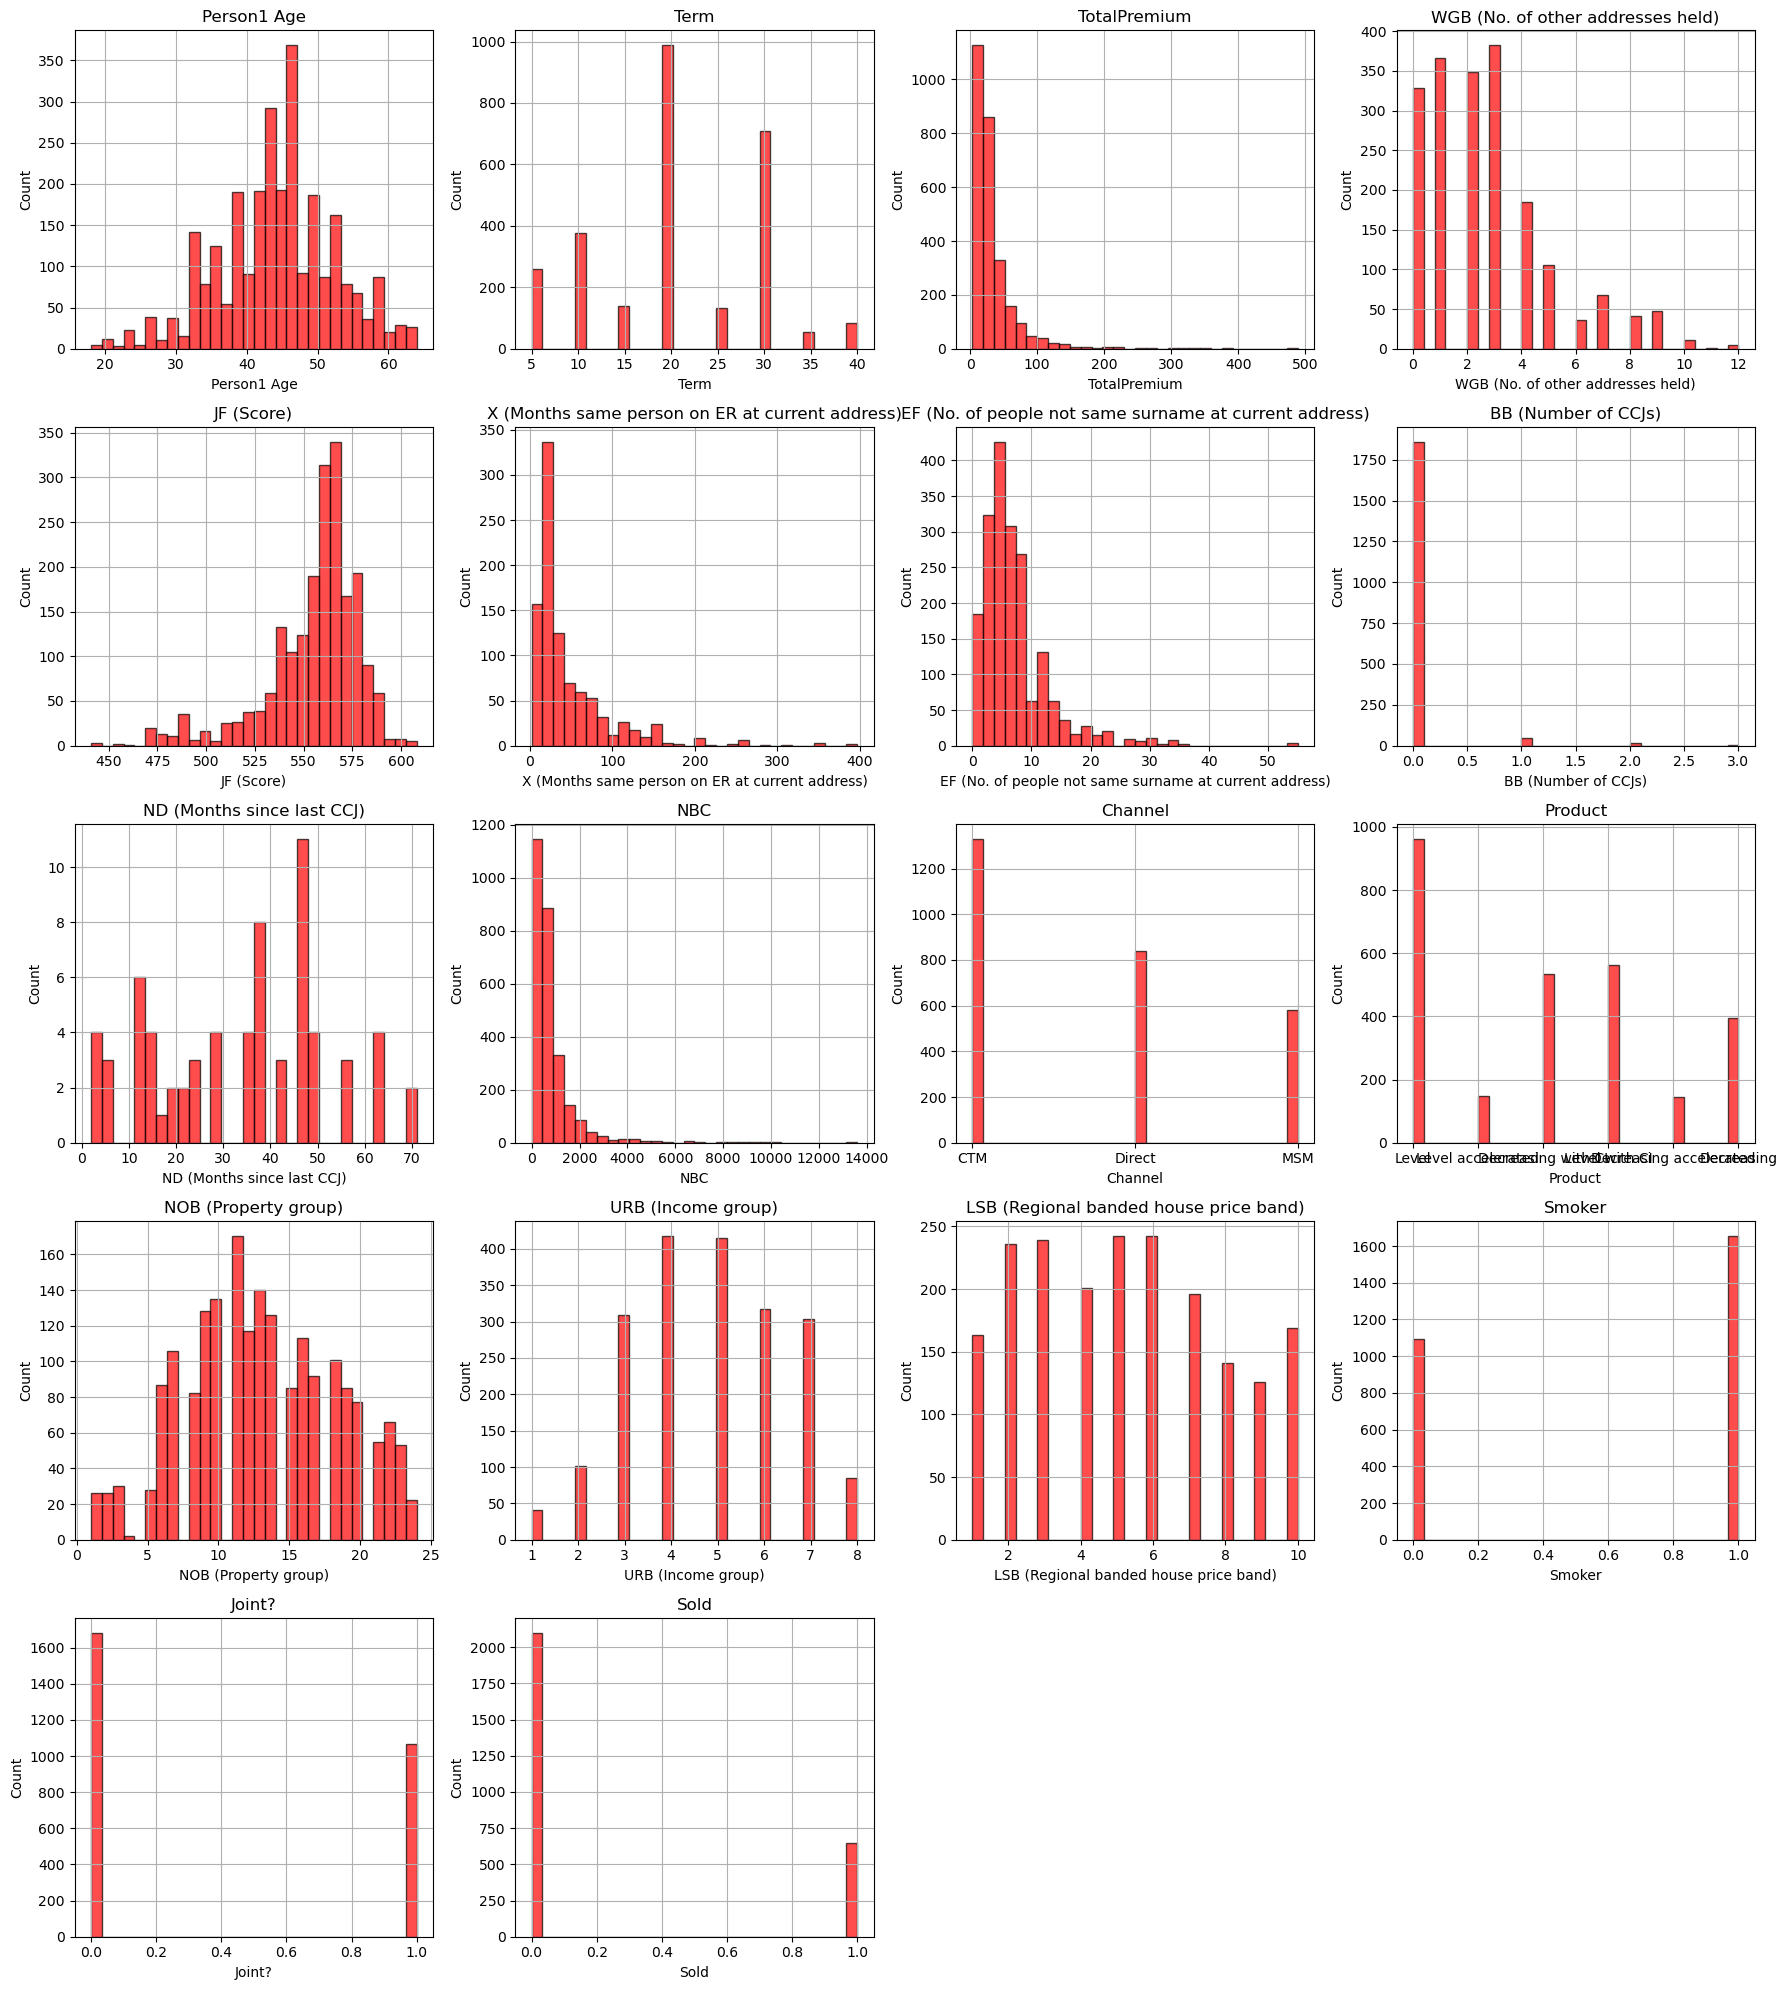

In [27]:
# Calculate the number of rows and columns required
num_feats = len(all_feats)
rows = math.ceil(num_feats / 4)  

# Plot histograms for all numeric features
plt.figure(figsize=(18, rows * 4))
for i, feat in enumerate(all_feats, 1):
    plt.subplot(rows, 4, i)  
    df[feat].hist(bins=30, alpha=0.7, color='red', edgecolor='black')
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()